In [200]:
import importlib
importlib.reload(loss)

<module 'stepping.loss' from '/home/lewington/code/ml/neural_synthesis/stepping/loss.py'>

In [1]:
import torch
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F

from utils import layers, hooking, img, stats, models
from stepping import loss, closure

In [2]:
vgg = models.vgg19()

In [5]:
hooker = hooking.Hooker(vgg)
hooker.attach_hooks("texture_hooks", [3, 6, 19, 26, 37])
hook_bag = hooker.get_bag()
vgg = layers.clipped_model(vgg, hooker.last_hooked_index())

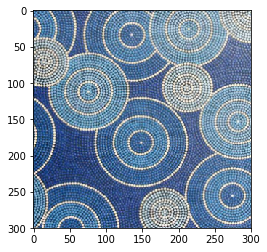

In [10]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(300),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/rings-2.jpg", transform)
img.show_image(example_texture)

In [11]:
vgg(example_texture)
target = stats.extract_features(hook_bag.get_hook("texture_hooks"), stats.gram_matrix)

def texture_loss_fn(target_grams, sample_features):
    sample_grams = [stats.gram_matrix(feature) for feature in sample_features]
    loss = 0
    
    for i in range(len(sample_grams)):
        loss += F.mse_loss(sample_grams[i], target_grams[i])
    
    return loss * 1000000

texture_loss = loss.LossFn(target, hook_bag.get_hook("texture_hooks"), texture_loss_fn)

In [12]:
collector = loss.LossCollector()
collector.add_loss_fn("texture", texture_loss)

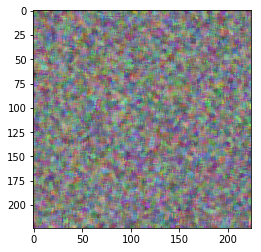

In [13]:
sample_texture = img.random_image(5, 224)
img.show_image(sample_texture)

inputs = {
    "sample": sample_texture,
    "loss_name": "texture"
}

optimizer = optim.LBFGS([sample_texture])

In [14]:
stepper = closure.Stepper(inputs, vgg, collector, optimizer)

In [15]:
for i in range(128):
    optimizer.step(stepper.loss_fn)

img.save_image(sample_texture, "data/synth/rings-2.jpg")

[tensor(4817.4062, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(4815.7285, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(4138.5127, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3284.5942, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(2466.3262, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1816.4169, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1436.0253, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1161.3999, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(971.3887, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(802.8796, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(688.9608, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(603.8289, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(500.6776, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(393.6261, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(400.2690, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(310.0230, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(288.1296, device='cuda:0', grad_fn=<MulB

[tensor(4.0297, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.9952, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.9456, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.8785, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.8199, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.7821, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.7564, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.7285, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.7049, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.6506, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.6269, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.5921, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.5300, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.4863, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.4522, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.4079, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.3658, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(3.3232, device='cuda:0'

[tensor(1.5609, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5542, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5463, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5402, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5347, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5296, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5261, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5219, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5153, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5095, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5048, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.5009, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.4957, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.4900, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.4860, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.4833, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.4768, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.4698, device='cuda:0'

[tensor(1.0832, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0805, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0785, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0770, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0743, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0724, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0711, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0700, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0680, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0652, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0644, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0623, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0613, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0599, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0585, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0571, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0553, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(1.0533, device='cuda:0'

[tensor(0.8898, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8891, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8878, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8869, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8860, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8853, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8845, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8834, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8821, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8813, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8804, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8797, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8791, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8783, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8771, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8765, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8748, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.8741, device='cuda:0'

[tensor(0.7803, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7797, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7791, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7787, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7782, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7776, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7770, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7764, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7758, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7754, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7750, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7743, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7736, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7730, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7723, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7715, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7708, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7703, device='cuda:0'

[tensor(0.7110, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7107, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7103, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7100, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7094, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7089, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7085, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7082, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7077, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7074, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7067, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7064, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7062, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7060, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7055, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7051, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7045, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.7040, device='cuda:0'

[tensor(0.6611, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6608, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6605, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6602, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6600, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6598, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6596, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6594, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6590, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6587, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6584, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6582, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6578, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6576, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6572, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6568, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6565, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6562, device='cuda:0'

[tensor(0.6249, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6247, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6245, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6244, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6241, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6239, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6238, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6234, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6233, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6231, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6229, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6227, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6224, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6223, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6220, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6218, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6215, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.6213, device='cuda:0'

[tensor(0.5987, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5985, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5984, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5982, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5981, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5979, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5978, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5976, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5974, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5972, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5971, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5969, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5968, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5967, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5966, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5964, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5963, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5962, device='cuda:0'

[tensor(0.5780, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5779, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5778, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5777, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5776, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5774, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5773, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5772, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5770, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5769, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5768, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5766, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5765, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5764, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5762, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5761, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5759, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5758, device='cuda:0'

[tensor(0.5608, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5606, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5605, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5604, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5603, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5603, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5601, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5600, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5600, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5598, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5598, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5597, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5595, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5594, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5593, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5592, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5591, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5590, device='cuda:0'

[tensor(0.5472, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5472, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5471, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5470, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5470, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5469, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5468, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5467, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5466, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5466, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5465, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5464, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5463, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5462, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5461, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5461, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5460, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5459, device='cuda:0'

[tensor(0.5370, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5370, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5369, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5368, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5368, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5367, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5367, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5366, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5366, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5365, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5364, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5364, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5363, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5362, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5362, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5361, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5360, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5360, device='cuda:0'

[tensor(0.5287, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5286, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5286, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5285, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5285, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5284, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5284, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5283, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5282, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5282, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5281, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5281, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5280, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5280, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5279, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5279, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5278, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5278, device='cuda:0'

[tensor(0.5213, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5213, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5212, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5212, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5211, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5211, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5211, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5210, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5210, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5209, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5209, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5208, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5208, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5208, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5207, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5207, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5206, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5206, device='cuda:0'

[tensor(0.5154, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5153, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5153, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5153, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5152, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5152, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5152, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5151, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5151, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5150, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5150, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5150, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5149, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5149, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5148, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5148, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5148, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5147, device='cuda:0'

[tensor(0.5102, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5102, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5102, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5101, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5101, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5101, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5100, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5100, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5100, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5099, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5099, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5099, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5098, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5098, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5098, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5097, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5097, device='cuda:0', grad_fn=<MulBackward>)]
[tensor(0.5097, device='cuda:0'

In [214]:
img.save_image(sample_texture, "data/synth/rings-2.jpg")